Wrote by: Oren Lauterman and Noam Zimran

In [187]:
# used to handle data
import pandas as pd

from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

load data into pd dataframe

In [169]:
Iris = datasets.load_iris()
irisdata = pd.DataFrame(data= np.c_[Iris['data'], Iris['target']],
                     columns= Iris['feature_names'] + ['class'])
irisdata.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Preprocess: split data to features and labels

In [170]:
X = irisdata.iloc[:,0:4]
# y = irisdata.select_dtypes(include=[object])
y = irisdata['class']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: class, dtype: float64

data contains 4 features (size of input layer) and 3 classes (size of output layer)

Train Test split: 80 % training set, 20 % test data

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Feature Scaling

In [172]:
scalar = StandardScaler()
scalar.fit(X_train)

X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)


### Training ANN using Scikit learn

Training and Predictions

In [173]:
mlps = []
mlps.append(MLPClassifier(hidden_layer_sizes=3, max_iter=1000))
mlps.append(MLPClassifier(hidden_layer_sizes=10, max_iter=1000))
mlps.append(MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000))

predictions = []
for i,mlp in enumerate(mlps):
    mlp.fit(X_train, y_train.values.ravel())
    predictions.append(mlp.predict(X_test))

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Evaluate the Algorithm

In [174]:
for prediction in predictions:
    print(confusion_matrix(y_test,prediction))
    print(classification_report(y_test,prediction))
    print('_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ ')

[[ 9  0  0]
 [ 0 10  1]
 [ 0  0 10]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       1.00      0.91      0.95        11
         2.0       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
[[ 9  0  0]
 [ 0 10  1]
 [ 0  0 10]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       1.00      0.91      0.95        11
         2.0       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
[[ 9  0  0]
 [ 0 10  1]
 [ 0  0 10]]
 

each time we train the models' we get little bit different results.
most of the times for both ANN with one hidden layer with 10 neurons and ANN with two hidden layers with 10 neurons each
we get almost perfect predictions on our test set.

### Training Random forest using Scikit learn

In [175]:
forest_clf = RandomForestClassifier(n_estimators=100)
forest_clf.fit(X_train, y_train)
y_pred = forest_clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 9  0  0]
 [ 0 10  1]
 [ 0  0 10]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       1.00      0.91      0.95        11
         2.0       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Text(0.5, 1.0, 'Visualizing Features Importance')

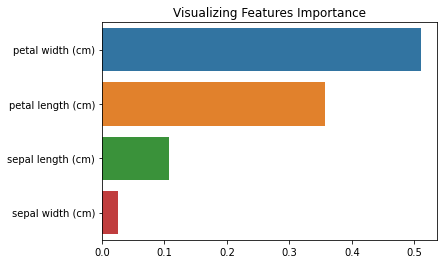

In [188]:
feature_importance = pd.Series(forest_clf.feature_importances_,index=X.columns).sort_values(ascending=False)
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title('Visualizing Features Importance')

Random Forest gave us equal or better results compare to ANN

### Data Analysis

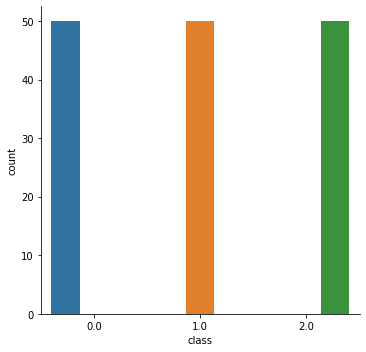

In [181]:
sns.catplot(x = "class", hue="class", kind="count", data=irisdata)

we have 150 samples, 50 for each class. that means the classes are balanced.

